### 1. 문제정의
- iris 데이터에 scaler를 사용하기

### 2. 데이터 수집
- iris 사용

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 3. 데이터 전처리
- 데이터 구조 확인

In [5]:
x = iris.data
y= iris.target

In [9]:
len(x)

150

In [10]:
len(y)

150

In [11]:
print('데이터셋 크기: ', iris['data'].shape)

데이터셋 크기:  (150, 4)


In [13]:
print('데이터셋 크기 : ', iris['target'].shape)

데이터셋 크기 :  (150,)


In [16]:
# 데이터프레임 형태로 변환
df = pd.DataFrame(x,columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
df.columns = ['sepal lenght', 'sepal width', 'petal length', 'petal width']
df.head()

,sepal lenght,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### scaler 적용

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [44]:
#스케일러 모델링
#학습
#데이터 변환
scaler = StandardScaler()
scaler.fit(df)
x_scaled = scaler.transform(df)

In [45]:
# 스케일러 학습과 변환을 동시에
# x_scaled = scaler.fit_transform(df)z

In [46]:
scale_df = pd.DataFrame(x_scaled, columns=iris.feature_names)
scale_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [47]:
scale_df.shape

(150, 4)

### 4. EDA(탐색적 분석) - 시각화 등

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale =1.2)

<AxesSubplot:>

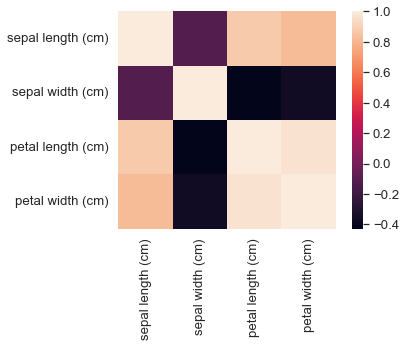

In [49]:
sns.heatmap(data=scale_df.corr(), square=True)

### 5~7 모델링(모델선택, 모델학습, 모델평가)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(scale_df,y,shuffle=True,random_state=0)

In [52]:
x_train.shape

(112, 4)

In [53]:
y_train.shape

(112,)

In [55]:
x_test.shape

(38, 4)

In [56]:
y_test.shape

(38,)

## < KNN,DT,SVM,로지스틱 회귀>

### [KNN]
- KNN 분류 알고리즘은 예측하려는 데이터(x)가 주어지면, 기존 데이터 중 속성이 비슷한 k개의 이웃을 먼저 찾는 알고리즘
- x 데이터에 가까이 있는 k개의 이웃을 찾고, 이 이웃데이터 중에 가장 많이 속해있는 lable으로 예측값을 결정하는 알고리즘
- k값에 따라 모델의 예측력이 달리지기 때문에 적절한 k개수를 정해줘야 함

In [70]:
from sklearn.neighbors import KNeighborsClassifier
# 모델정의 - 하이퍼파라미터(n_neighbors=)
knn = KNeighborsClassifier(n_neighbors=5)
# 학습
knn.fit(x_train,y_train)
# 예측
pred = knn.predict(x_test)
# 평가
knn.score(x_test, y_test)

0.9736842105263158

In [71]:
from sklearn.metrics import accuracy_score

acc= accuracy_score(y_test, pred)
acc

0.9736842105263158

### [Logistic Regression]
- 이름은 회귀지만 분류 알고리즘
- 시그모이드 함수 출력값(0-1사이)을 각 분류 클래스에 속하게 될 확률값으로 사용
- 1에 가까우면 해당 클래스로 분류를 하고, 0에 가까우면 

In [74]:
from sklearn.linear_model import LogisticRegression

# 모델생성
log = LogisticRegression()
# 학습
log.fit(x_train,y_train)
# 예측
pred1 = log.predict(x_test)
# 평가
print(log.score(x_test, y_test))
print(accuracy_score(y_test, pred1))

0.9736842105263158
0.9736842105263158


In [75]:
# predict_proba를 사용하면 각 클래스에 속할 확률값을 예측 할 수 있다.
prob = log.predict_log_proba(x_test)
prob

array([[-8.96504595e+00, -3.53269217e+00, -2.97933754e-02],
       [-5.16286589e+00, -4.70827246e-02, -3.21224144e+00],
       [-4.20951033e-03, -5.47252521e+00, -1.67833097e+01],
       [-1.07393958e+01, -2.53099573e+00, -8.29484579e-02],
       [-2.35910243e-02, -3.75868818e+00, -1.42825152e+01],
       [-1.03063476e+01, -4.67371473e+00, -9.41512241e-03],
       [-1.63654703e-02, -4.12078191e+00, -1.45792376e+01],
       [-5.04687677e+00, -3.27604541e-01, -1.29856679e+00],
       [-6.15061162e+00, -3.09365141e-01, -1.33197633e+00],
       [-3.83482180e+00, -1.07069201e-01, -2.52658757e+00],
       [-6.66235119e+00, -8.21707788e-01, -5.81531157e-01],
       [-3.92594124e+00, -2.64106818e-01, -1.54935496e+00],
       [-4.34438098e+00, -1.51815667e-01, -2.05671125e+00],
       [-5.58829782e+00, -3.57998786e-01, -1.21340150e+00],
       [-4.39575571e+00, -2.82225034e-01, -1.45428855e+00],
       [-8.37742408e-03, -4.78641419e+00, -1.59914244e+01],
       [-4.20224521e+00, -3.22573133e-01

### [Decision Tree]
- 의사결정나무 모델은 트리 알고리즘을 사용
- 트리의 각 분기점(node)에 데이터셋의 피처를 하나씩 위치시킴
- 각 노드에서 해당 피처에 관해서 임의의 조건식을 가지고 계속 2개 이상의 줄기로 가지를 나누면서 데이터를 구분함
- 이때, 각 분기점에서 분류가 가장 잘 되는 최적의 기준을 찾는 과정이 중요
- 하이퍼파라미터가 많음 -> 과대적합을 방지 필요

In [76]:
from sklearn.tree import DecisionTreeClassifier
#모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
# 학습
tree.fit(x_train,y_train)
# 예측
pred2 = tree.predict(x_test)
# 평가
print(tree.score(x_test, y_test))
print(accuracy_score(y_test, pred2))

0.9736842105263158
0.9736842105263158


In [77]:
pred2

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

### [SVM]
- svm 알고리즘은 데이터셋의 각 피처(열) 벡터들이 고유의 축을 갖는 벡터 공간을 이룬다고 가정
- 모든 데이터를 베터 공간 내의 좌표에 점으로 표시하고, 각 데이터가 속하는 목표 클래스(label) 별로 나뉜다고 생각을 하면됨
- hyper plane(초평면) : 데이처 차원이 N차원을 가지고 있으면, N-1 차원을 가지subspace 표현이 됨
- support vector : 각 클래스별로 최외각에 있는 벡터
- magin : 각 레이블들 사이의 여백
- c : 이상치 - hard margin(이상치 허용X) / soft margin(이상치 허용o)
- gamma : 결정경계의 곡률을 결정하는데 사용이 됨
- kernel : 'linear'- 선형, 'poly'- 다항식, 'rbf'- 가우시안 함수

In [80]:
from sklearn.svm import SVC
svc =SVC(kernel='linear')       #'linear','poly','rbf'
# 학습
svc.fit(x_train,y_train)
# 예측
pred3 = svc.predict(x_test)
# 평가
print(svc.score(x_test, y_test))
print(accuracy_score(y_test, pred3))

0.9736842105263158
0.9736842105263158
